<a href="https://colab.research.google.com/github/LazyHooks/models_aon_comb/blob/main/market%20leader%20bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [142]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [144]:
dataset = pd.read_csv('BP-Attr_marketleading_binary.csv')

split

In [145]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [146]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [147]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [148]:
print(model.feature_importances_)

[0.00622474 0.00605683 0.         0.05134578 0.03865867 0.08578692
 0.02334681 0.02266042 0.         0.02263057 0.11722492 0.01837366
 0.08326    0.02843775 0.16081287 0.         0.01781999 0.
 0.0492167  0.06769469 0.07279574 0.06836101 0.00281156 0.
 0.05648033]


feature importance & weights

In [149]:
#0 Jr
#1 Mid
#2 Pay Positioning <20
#3 Pay Positioning 20<x<40
#4 Pay Positioning 40<X<60
#5 Pay Positioning 60<X<80
#6 Pay Positioning <80
#7 Pay Range <20
#8 Pay Range 20<x<40
#9 Pay Range 40<X<60
#10 Pay Range 60<X<80
#11 Pay Range <80
#12 Internal
#13 Balanced
#14 External
#15 Pay Mix <20
#16 Pay Mix 20<x<40
#17 Pay Mix 40<X<60
#18 Pay Mix 60<X<80
#19 Pay Mix <80
#20 Pay Differentiation <20
#21 Pay Differentiation 20<x<40
#22 Pay Differentiation 40<X<60
#23 Pay Differentiation 60<X<80
#24 Pay Differentiation <80

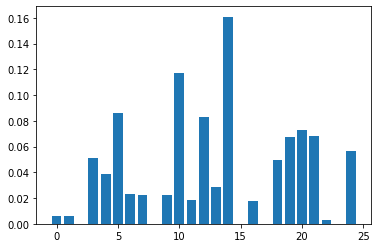

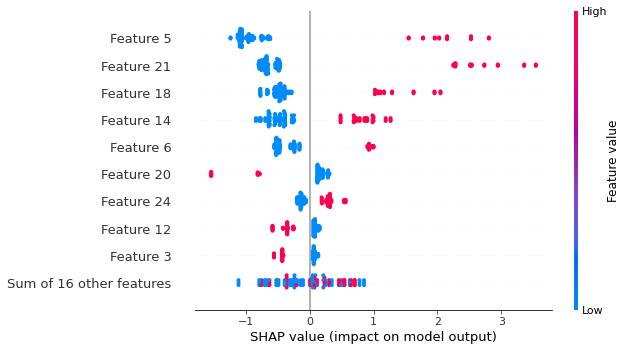

In [150]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
	


predict

In [151]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [152]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='binary')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 95.56%
Precision: 1.000
Recall: 0.818
F-Measure: 0.900


visualise single

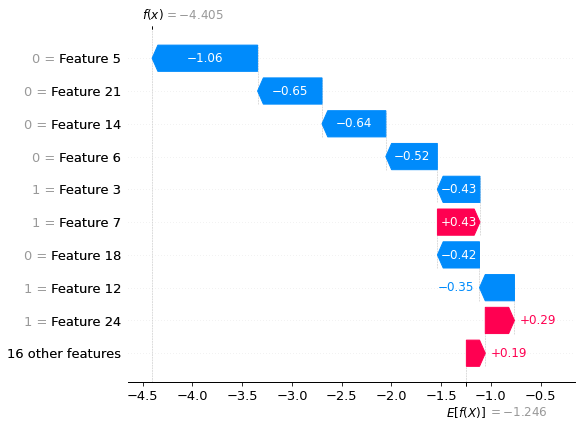

In [153]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [154]:
#singlepred = model.predict([[0,1,1,1,1,0,0,5,5]])
#singleprediction = [round(value) for value in y_pred]
#print(singlepred)